<a href="https://colab.research.google.com/github/jhuee/DeepLearning/blob/main/Part3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [2]:
#데이터셋은 dictionary와 유사한 Bunch클래스
print(diabetes.data.shape, diabetes.target.shape)

(442, 10) (442,)


In [3]:
print(diabetes.data[0:3])

[[ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990749 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632753 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06833155 -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 -0.00567042 -0.04559945 -0.03419447
  -0.03235593 -0.00259226  0.00286131 -0.02593034]]


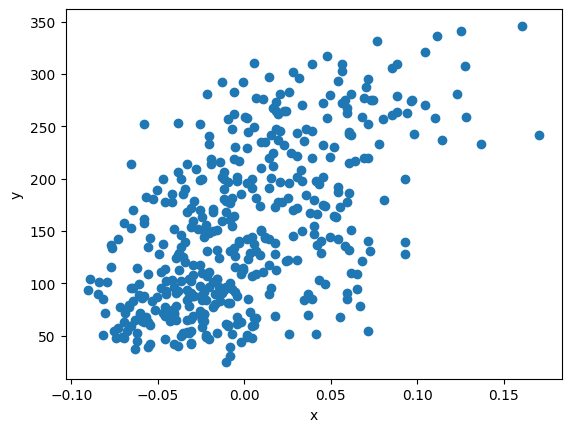

In [7]:
import matplotlib.pyplot as plt
plt.scatter(diabetes.data[:, 2], diabetes.target)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [9]:
#훈련 데이터 준비
x = diabetes.data[:,2]
y = diabetes.target

In [25]:
# w와 b 초기화
w = 1.0
b = 1.0
y_hat = x[0]*w +b
print(y_hat)

1.0616962065186832


In [26]:
print(y[0]) ##정답

151.0


In [27]:
#w값(기울기) 조절하여 예측값 변경
w_inc = w + 0.1 #기울기 0.1만큼 증가

In [28]:
y_hat_inc = x[0]*w_inc + b
print(y_hat_inc)

1.0678658271705517


In [29]:
#예측값 증가 정도 확인
w_rate = (y_hat_inc - y_hat)/(w_inc - w)

In [30]:
print(w_rate)

0.06169620651868429


In [31]:
print(x[0])

0.061696206518683294


In [24]:
for x_i, y_i in zip(x, y): #여러개의 배열에서 동시에 요소를 하나씩 꺼내준다.

  y_hat = x_i*w +b
  err = y_i - y_hat
  w_rate = x_i
  w = w+w_rate *err
  b = b+1*err
print(w, b)

nan nan


In [32]:
#Epoch사용
for i in range(1, 100):
  for x_i, y_i in zip(x, y):
    y_hat = x_i*w +b
    err = y_i - y_hat
    w_rate = x_i
    w = w+w_rate * err
    b = b+1 *err
print(w,b)

913.5973364346786 123.39414383177173


In [33]:
x_new = 0.18
y_pred = x_new*w+b
print(y_pred) #예측값

287.8416643900139


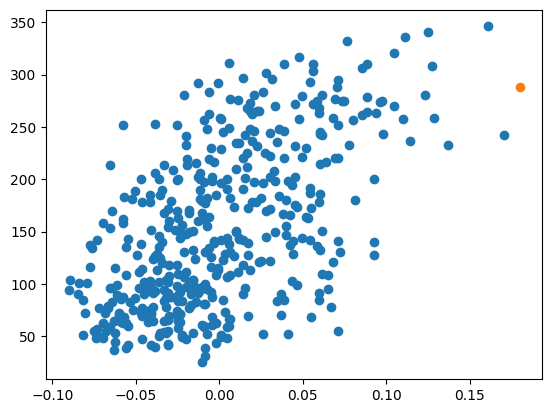

In [34]:
plt.scatter(x,y)
plt.scatter(x_new, y_pred)

In [49]:
# 선형 회귀를 위한 뉴런
class Neuron :
    def __init__(self) :
      self.w = 1.0
      self.b = 1.0
      #정방향 계산
    def forpass (self, x) :
      y_hat = x*self.w + self.b
      return y_hat
      #역방향 계산
    def backprop(self, x, err) :
      w_grad = x*err
      b_grad = 1*err
      return w_grad, b_grad
    def fit (self, x, y, epochs = 100):
        for i in range(epochs) :
          for x_i, y_i in zip(x, y):
            y_hat = self.forpass(x_i) #정방향 계산
            err = -(y_i - y_hat) #오차 계산(빼주기)
            w_grad, b_grad = self.backprop(x_i, err) #역방향 계산
            self.w -= w_grad
            self.b -= b_grad

In [37]:
#정방향 계산
def forpass (self, x) :
  y_hat = x*self.w + self.b
  return y_hat

In [38]:
#역방향 계산
def backprop(self, x, err) :
  w_grad = x*err
  b_grad = 1*err
  return w_grad, b_grad

In [46]:
def fit (self, x, y, epochs = 100):
  for i in range(epochs) :
    for x, y in zip(x, y):
      y_hat = self.forpass(x_i) #정방향 계산
      err = -(y_i - y_hat) #오차 계산(빼주기)
      w_grad, b_grad = self.backprop(x_i, err) #역방향 계산
      self.w -= w_grad
      self.b -= b_grad

In [50]:
neuron = Neuron()
neuron.fit(x,y)

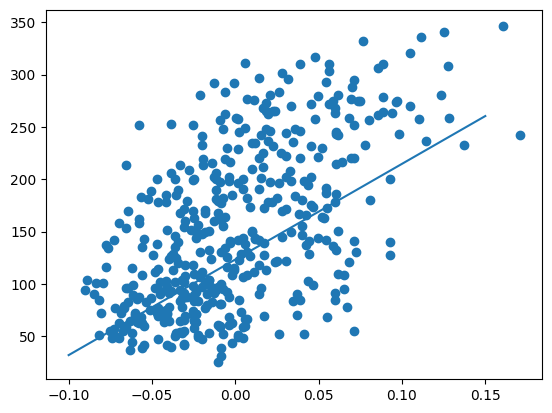

In [51]:
plt.scatter(x,y)
pt1 = (-0.1, -0.1*neuron.w +neuron.b)
pt2 = (0.15,0.15*neuron.w + neuron.b)
plt.plot([pt1[0],pt2[0]],[pt1[1],pt2[1]])